In [50]:
import openseespy.opensees as ops

# Model Initialization
ops.wipe()
ops.model('Basic', '-ndm', 3, '-ndf', 6)

# Define material properties
E = 210e9  # Young's modulus (Pa)
nu = 0.3   # Poisson's ratio
fy = 250e6  # Yield stress (Pa)
b = 0.01  # Strain hardening ratio
t = 0.01  # Thickness of the shell elements (m)

# Steel material definition using Steel02
ops.uniaxialMaterial('Steel02', 1, fy, E, b)

# Section definition
ops.section('ElasticMembranePlateSection', 1, E, nu, t)

# Box dimensions
length = 1.0  # Length of the box (m)
width = 1.0   # Width of the box (m)
height = 1.0  # Height of the box (m)

# Number of elements along each dimension
num_elem_x = 10
num_elem_y = 10
num_elem_z = 10

# Create nodes on the surface of the box
node_id = 1
node_map = {}

def create_node(x, y, z):
    global node_id
    if (x, y, z) not in node_map:
        ops.node(node_id, x, y, z)
        node_map[(x, y, z)] = node_id
        node_id += 1
    return node_map[(x, y, z)]

# Bottom face
for i in range(num_elem_x + 1):
    for j in range(num_elem_y + 1):
        create_node(i * length / num_elem_x, j * width / num_elem_y, 0)

# Top face
for i in range(num_elem_x + 1):
    for j in range(num_elem_y + 1):
        create_node(i * length / num_elem_x, j * width / num_elem_y, height)

# Front face
for i in range(num_elem_x + 1):
    for k in range(num_elem_z + 1):
        create_node(i * length / num_elem_x, 0, k * height / num_elem_z)

# Back face
for i in range(num_elem_x + 1):
    for k in range(num_elem_z + 1):
        create_node(i * length / num_elem_x, width, k * height / num_elem_z)

# Left face
for j in range(num_elem_y + 1):
    for k in range(num_elem_z + 1):
        create_node(0, j * width / num_elem_y, k * height / num_elem_z)

# Right face
for j in range(num_elem_y + 1):
    for k in range(num_elem_z + 1):
        create_node(length, j * width / num_elem_y, k * height / num_elem_z)

# Create MITC4 shell elements for the sides of the box
element_id = 1

# Bottom face elements (fixed, no pressure applied)
for i in range(num_elem_x):
    for j in range(num_elem_y):
        n1 = create_node(i * length / num_elem_x, j * width / num_elem_y, 0)
        n2 = create_node((i + 1) * length / num_elem_x, j * width / num_elem_y, 0)
        n3 = create_node((i + 1) * length / num_elem_x, (j + 1) * width / num_elem_y, 0)
        n4 = create_node(i * length / num_elem_x, (j + 1) * width / num_elem_y, 0)
        ops.element('ShellMITC4', element_id, n1, n2, n3, n4, 1)
        element_id += 1

# Top face elements
for i in range(num_elem_x):
    for j in range(num_elem_y):
        n1 = create_node(i * length / num_elem_x, j * width / num_elem_y, height)
        n2 = create_node((i + 1) * length / num_elem_x, j * width / num_elem_y, height)
        n3 = create_node((i + 1) * length / num_elem_x, (j + 1) * width / num_elem_y, height)
        n4 = create_node(i * length / num_elem_x, (j + 1) * width / num_elem_y, height)
        ops.element('ShellMITC4', element_id, n1, n2, n3, n4, 1)
        element_id += 1

# Front face elements
for i in range(num_elem_x):
    for k in range(num_elem_z):
        n1 = create_node(i * length / num_elem_x, 0, k * height / num_elem_z)
        n2 = create_node((i + 1) * length / num_elem_x, 0, k * height / num_elem_z)
        n3 = create_node((i + 1) * length / num_elem_x, 0, (k + 1) * height / num_elem_z)
        n4 = create_node(i * length / num_elem_x, 0, (k + 1) * height / num_elem_z)
        ops.element('ShellMITC4', element_id, n1, n2, n3, n4, 1)
        element_id += 1

# Back face elements
for i in range(num_elem_x):
    for k in range(num_elem_z):
        n1 = create_node(i * length / num_elem_x, width, k * height / num_elem_z)
        n2 = create_node((i + 1) * length / num_elem_x, width, k * height / num_elem_z)
        n3 = create_node((i + 1) * length / num_elem_x, width, (k + 1) * height / num_elem_z)
        n4 = create_node(i * length / num_elem_x, width, (k + 1) * height / num_elem_z)
        ops.element('ShellMITC4', element_id, n1, n2, n3, n4, 1)
        element_id += 1

# Left face elements
for j in range(num_elem_y):
    for k in range(num_elem_z):
        n1 = create_node(0, j * width / num_elem_y, k * height / num_elem_z)
        n2 = create_node(0, (j + 1) * width / num_elem_y, k * height / num_elem_z)
        n3 = create_node(0, (j + 1) * width / num_elem_y, (k + 1) * height / num_elem_z)
        n4 = create_node(0, j * width / num_elem_y, (k + 1) * height / num_elem_z)
        ops.element('ShellMITC4', element_id, n1, n2, n3, n4, 1)
        element_id += 1

# Right face elements
for j in range(num_elem_y):
    for k in range(num_elem_z):
        n1 = create_node(length, j * width / num_elem_y, k * height / num_elem_z)
        n2 = create_node(length, (j + 1) * width / num_elem_y, k * height / num_elem_z)
        n3 = create_node(length, (j + 1) * width / num_elem_y, (k + 1) * height / num_elem_z)
        n4 = create_node(length, j * width / num_elem_y, (k + 1) * height / num_elem_z)
        ops.element('ShellMITC4', element_id, n1, n2, n3, n4, 1)
        element_id += 1

# Apply boundary conditions (fixing the bottom face)
for i in range(num_elem_x + 1):
    for j in range(num_elem_y + 1):
        node_id = create_node(i * length / num_elem_x, j * width / num_elem_y, 0)
        ops.fix(node_id, 1, 1, 1, 1, 1, 1)

# Apply uniform crushing pressure on all faces except the bottom
crushing_pressure = -1e6  # Pressure in Pa (negative for compression)
load_pattern_id = 1
ops.timeSeries('Linear', load_pattern_id)
ops.pattern('Plain', load_pattern_id, load_pattern_id)

# Apply pressure on the top face
for i in range(num_elem_x):
    for j in range(num_elem_y):
        n1 = create_node(i * length / num_elem_x, j * width / num_elem_y, height)
        n2 = create_node((i + 1) * length / num_elem_x, j * width / num_elem_y, height)
        n3 = create_node((i + 1) * length / num_elem_x, (j + 1) * width / num_elem_y, height)
        n4 = create_node(i * length / num_elem_x, (j + 1) * width / num_elem_y, height)
        ops.load(n1, 0, 0, crushing_pressure * t / (num_elem_x * num_elem_y), 0, 0, 0)
        ops.load(n2, 0, 0, crushing_pressure * t / (num_elem_x * num_elem_y), 0, 0, 0)
        ops.load(n3, 0, 0, crushing_pressure * t / (num_elem_x * num_elem_y), 0, 0, 0)
        ops.load(n4, 0, 0, crushing_pressure * t / (num_elem_x * num_elem_y), 0, 0, 0)

# Apply pressure on the front face
for i in range(num_elem_x):
    for k in range(num_elem_z):
        n1 = create_node(i * length / num_elem_x, 0, k * height / num_elem_z)
        n2 = create_node((i + 1) * length / num_elem_x, 0, k * height / num_elem_z)
        n3 = create_node((i + 1) * length / num_elem_x, 0, (k + 1) * height / num_elem_z)
        n4 = create_node(i * length / num_elem_x, 0, (k + 1) * height / num_elem_z)
        ops.load(n1, 0, -crushing_pressure * t / (num_elem_x * num_elem_z), 0, 0, 0, 0)
        ops.load(n2, 0, -crushing_pressure * t / (num_elem_x * num_elem_z), 0, 0, 0, 0)
        ops.load(n3, 0, -crushing_pressure * t / (num_elem_x * num_elem_z), 0, 0, 0, 0)
        ops.load(n4, 0, -crushing_pressure * t / (num_elem_x * num_elem_z), 0, 0, 0, 0)

# Apply pressure on the back face
for i in range(num_elem_x):
    for k in range(num_elem_z):
        n1 = create_node(i * length / num_elem_x, width, k * height / num_elem_z)
        n2 = create_node((i + 1) * length / num_elem_x, width, k * height / num_elem_z)
        n3 = create_node((i + 1) * length / num_elem_x, width, (k + 1) * height / num_elem_z)
        n4 = create_node(i * length / num_elem_x, width, (k + 1) * height / num_elem_z)
        ops.load(n1, 0, crushing_pressure * t / (num_elem_x * num_elem_z), 0, 0, 0, 0)
        ops.load(n2, 0, crushing_pressure * t / (num_elem_x * num_elem_z), 0, 0, 0, 0)
        ops.load(n3, 0, crushing_pressure * t / (num_elem_x * num_elem_z), 0, 0, 0, 0)
        ops.load(n4, 0, crushing_pressure * t / (num_elem_x * num_elem_z), 0, 0, 0, 0)

# Apply pressure on the left face
for j in range(num_elem_y):
    for k in range(num_elem_z):
        n1 = create_node(0, j * width / num_elem_y, k * height / num_elem_z)
        n2 = create_node(0, (j + 1) * width / num_elem_y, k * height / num_elem_z)
        n3 = create_node(0, (j + 1) * width / num_elem_y, (k + 1) * height / num_elem_z)
        n4 = create_node(0, j * width / num_elem_y, (k + 1) * height / num_elem_z)
        ops.load(n1, -crushing_pressure * t / (num_elem_y * num_elem_z), 0, 0, 0, 0, 0)
        ops.load(n2, -crushing_pressure * t / (num_elem_y * num_elem_z), 0, 0, 0, 0, 0)
        ops.load(n3, -crushing_pressure * t / (num_elem_y * num_elem_z), 0, 0, 0, 0, 0)
        ops.load(n4, -crushing_pressure * t / (num_elem_y * num_elem_z), 0, 0, 0, 0, 0)

# Apply pressure on the right face
for j in range(num_elem_y):
    for k in range(num_elem_z):
        n1 = create_node(length, j * width / num_elem_y, k * height / num_elem_z)
        n2 = create_node(length, (j + 1) * width / num_elem_y, k * height / num_elem_z)
        n3 = create_node(length, (j + 1) * width / num_elem_y, (k + 1) * height / num_elem_z)
        n4 = create_node(length, j * width / num_elem_y, (k + 1) * height / num_elem_z)
        ops.load(n1, crushing_pressure * t / (num_elem_y * num_elem_z), 0, 0, 0, 0, 0)
        ops.load(n2, crushing_pressure * t / (num_elem_y * num_elem_z), 0, 0, 0, 0, 0)
        ops.load(n3, crushing_pressure * t / (num_elem_y * num_elem_z), 0, 0, 0, 0, 0)
        ops.load(n4, crushing_pressure * t / (num_elem_y * num_elem_z), 0, 0, 0, 0, 0)

# Analysis parameters
ops.constraints('Plain')
ops.numberer('Plain')
ops.system('BandGeneral')
ops.algorithm('Newton')
ops.integrator('LoadControl', 1.0)
ops.analysis('Static')

Vol= []
# Perform the analysis
for i in range(100):
    ops.analyze(1)
    
    points = np.array([np.add(ops.nodeCoord(i),ops.nodeDisp(i)[0:3]) for i in ops.getNodeTags()])
    # Perform Delaunay triangulation
    tri = Delaunay(points)

    # Calculate the total volume of all tetrahedra
    total_volume = 0.0
    for simplex in tri.simplices:
        a, b, c, d = points[simplex]
        total_volume += tetrahedron_volume(a, b, c, d)
        
    Vol.append([ops.getLoadFactor(1), total_volume])
print("Node displacement:", node_disp)


Node displacement: [-3.9727541330282663e-19, 3.44866088807133e-18, -0.02621919401407878, -1.9256264519034496e-14, 1.0066786863346893e-14, -2.1298673401402776e-17]


In [47]:
# import numpy as np
# from scipy.spatial import Delaunay
# points = np.array([np.add(ops.nodeCoord(i),ops.nodeDisp(i)[0:3]) for i in ops.getNodeTags()])
# # Perform Delaunay triangulation
# tri = Delaunay(points)

# # Calculate the total volume of all tetrahedra
# total_volume = 0.0
# for simplex in tri.simplices:
#     a, b, c, d = points[simplex]
#     total_volume += tetrahedron_volume(a, b, c, d)

def tetrahedron_volume(a, b, c, d):
    """
    Calculate the volume of a tetrahedron given its vertices a, b, c, and d.
    The volume is given by the absolute value of the determinant of a matrix
    composed of the vectors ab, ac, and ad divided by 6.
    """
    mat = np.array([a - d, b - d, c - d])
    return np.abs(np.linalg.det(mat)) / 6.0



print("Total volume of the triangulated points:", total_volume)


Total volume of the triangulated points: 0.9999613387750889


In [ ]:
import opsvis as opsv
import matplotlib.pyplot as plt
%matplotlib notebook

#opsv.plot_model(node_labels=0,element_labels=0,node_supports=0)
opsv.plot_defo(sfac=5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


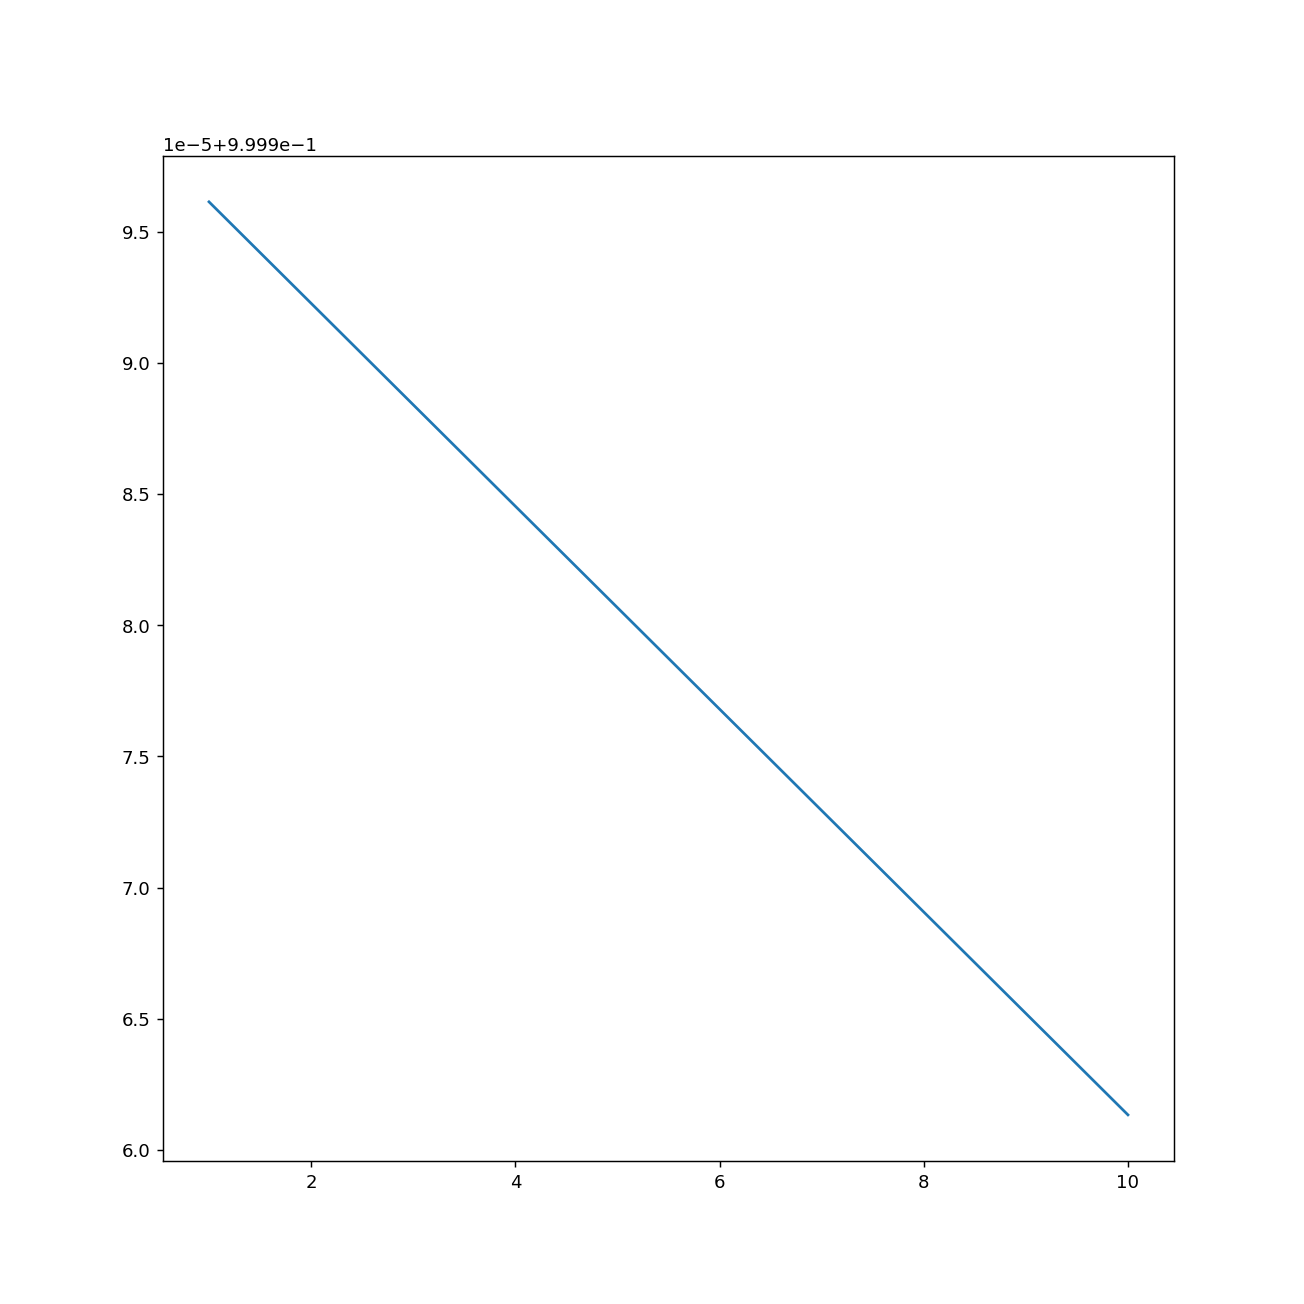

In [49]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
Vol = np.array(Vol)
ax.plot(Vol[:,0], Vol[:,1])
ax.set_xlabel('Load Factor')
ax.set_ylabel('Volume')